In [44]:
import pandas as pd
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv('/kaggle/input/used-car-price-data-from-cars24/cars24data.csv')
df.head()

,Model Name,Price,Manufacturing_year,Engine capacity,Spare key,Transmission,KM driven,Ownership,Fuel type,Imperfections,Repainted Parts
0,2017 Maruti Swift VXI,561000,2017,1197,No,Manual,25847,2,Petrol,6,2
1,2016 Maruti Baleno DELTA PETROL 1.2,498000,2016,1197,Yes,Manual,55511,2,Petrol,12,1
2,2020 Maruti Swift VXI,577000,2020,1197,No,Manual,47110,1,Petrol,4,2
3,2022 Maruti Ertiga VXI AT SHVS,1084000,2022,1462,Yes,Automatic,35378,1,Petrol,2,3
4,2019 Maruti Dzire VXI,603000,2019,1197,Yes,Manual,91856,1,Petrol,3,2


In [46]:
df.shape

(1445, 11)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1445 entries, 0 to 1444
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Model Name          1445 non-null   object
 1   Price               1445 non-null   int64 
 2   Manufacturing_year  1445 non-null   int64 
 3   Engine capacity     1445 non-null   int64 
 4   Spare key           1445 non-null   object
 5   Transmission        1445 non-null   object
 6   KM driven           1445 non-null   int64 
 7   Ownership           1445 non-null   int64 
 8   Fuel type           1445 non-null   object
 9   Imperfections       1445 non-null   int64 
 10  Repainted Parts     1445 non-null   int64 
dtypes: int64(7), object(4)
memory usage: 124.3+ KB


In [48]:
df.columns

Index(['Model Name', 'Price', 'Manufacturing_year', 'Engine capacity',
       'Spare key', 'Transmission', 'KM driven', 'Ownership', 'Fuel type',
       'Imperfections', 'Repainted Parts'],
      dtype='object')

In [49]:
df.describe()

,Price,Manufacturing_year,Engine capacity,KM driven,Ownership,Imperfections,Repainted Parts
count,1.445000e+03,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000,1445.000000
mean,5.263543e+05,2017.817301,1142.104498,50588.903114,1.285121,9.597232,3.228374
std,1.963696e+05,2.986554,169.020818,27339.562631,0.489877,8.398637,3.364578
min,1.390000e+05,2010.000000,796.000000,1207.000000,1.000000,0.000000,0.000000
25%,3.900000e+05,2016.000000,998.000000,28803.000000,1.000000,3.000000,0.000000
50%,5.010000e+05,2018.000000,1197.000000,47849.000000,1.000000,8.000000,2.000000
75%,6.310000e+05,2020.000000,1197.000000,70337.000000,2.000000,14.000000,5.000000
max,1.599000e+06,2023.000000,1462.000000,124716.000000,3.000000,43.000000,27.000000


In [50]:
df.duplicated().sum()

0

**Price: Let's find the outliers with box plot.**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


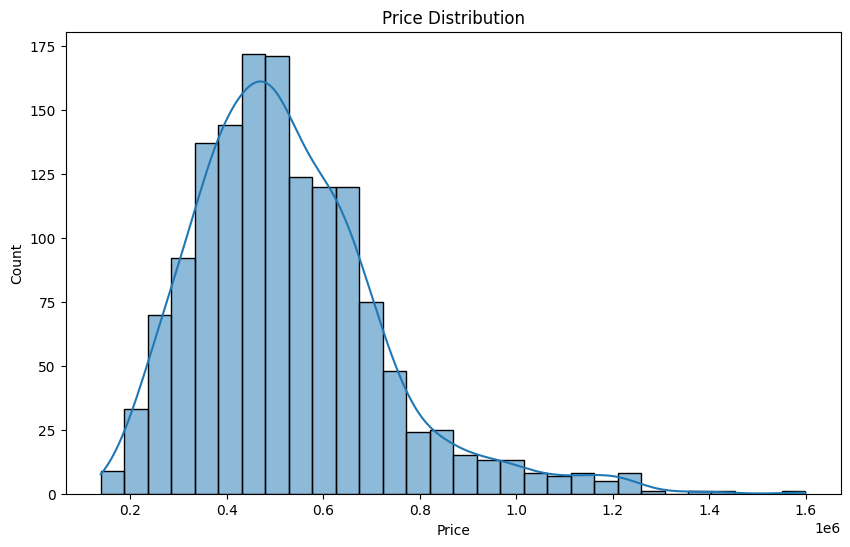

In [51]:
plt.figure(figsize=(10,6))
sns.histplot(df['Price'], bins=30, kde=True)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

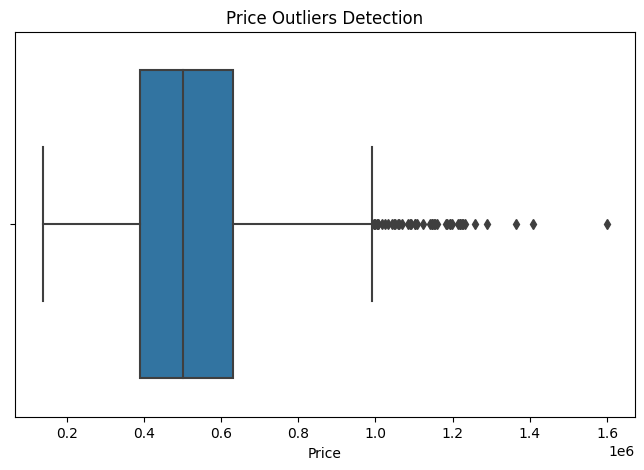

In [52]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['Price'])
plt.title("Price Outliers Detection")
plt.show()

In [53]:
year_counts = df['Manufacturing_year'].value_counts().sort_index()
print(year_counts)

Manufacturing_year
2010      1
2011     28
2012     39
2013     57
2014    102
2015     88
2016    143
2017    218
2018    161
2019    150
2020    138
2021    133
2022    125
2023     62
Name: count, dtype: int64


**Manufacturing_year: Count of cars by year, trend over time.**

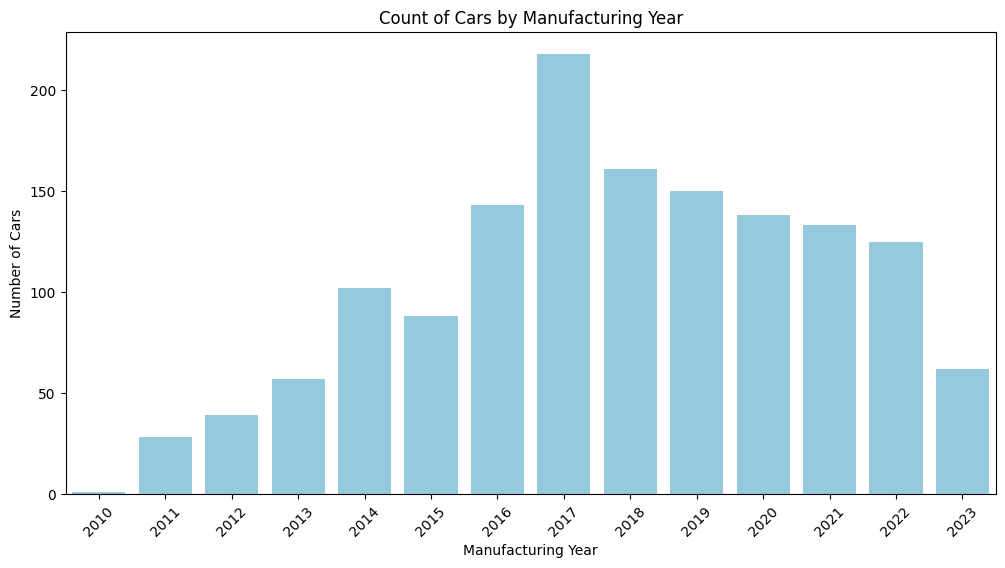

In [54]:
plt.figure(figsize=(12,6))
sns.barplot(x=year_counts.index, y=year_counts.values, color="skyblue")
plt.title("Count of Cars by Manufacturing Year")
plt.xlabel("Manufacturing Year")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

In [55]:
# Extract the brand from Model name
df['Brand'] = df['Model Name'].str.split().str[1]
print(df[['Model Name', 'Brand']].head(10))

                            Model Name   Brand
0                2017 Maruti Swift VXI  Maruti
1  2016 Maruti Baleno DELTA PETROL 1.2  Maruti
2                2020 Maruti Swift VXI  Maruti
3       2022 Maruti Ertiga VXI AT SHVS  Maruti
4                2019 Maruti Dzire VXI  Maruti
5             2014 Maruti Alto 800 LXI  Maruti
6                2020 Maruti Swift VXI  Maruti
7            2018 Maruti Dzire VXI AMT  Maruti
8          2016 Maruti Swift Dzire VXI  Maruti
9             2019 Maruti S PRESSO VXI  Maruti


In [56]:
df['Brand'].value_counts()

Brand
Maruti    1445
Name: count, dtype: int64

In [57]:
# Extract the model from Model name
df['Model'] = df['Model Name'].str.split().str[2]
print(df[['Model Name', 'Model']])

                               Model Name   Model
0                   2017 Maruti Swift VXI   Swift
1     2016 Maruti Baleno DELTA PETROL 1.2  Baleno
2                   2020 Maruti Swift VXI   Swift
3          2022 Maruti Ertiga VXI AT SHVS  Ertiga
4                   2019 Maruti Dzire VXI   Dzire
...                                   ...     ...
1440          2021 Maruti Ertiga VXI SHVS  Ertiga
1441                 2015 Maruti Ciaz ZXI    Ciaz
1442  2019 Maruti Baleno DELTA PETROL 1.2  Baleno
1443     2017 Maruti Ciaz S 1.4 MT PETROL    Ciaz
1444          2012 Maruti Wagon R 1.0 LXI   Wagon

[1445 rows x 2 columns]


In [58]:
df['Model'].value_counts()

Model
Baleno     236
Swift      212
Alto       161
Celerio    141
Wagon      141
Ciaz       139
New         94
S           71
Dzire       66
IGNIS       65
Ertiga      32
Vitara      29
XL6         21
BREZZA      15
Eeco         8
Ritz         7
Grand        2
A            2
OMNI         1
Zen          1
Omni         1
Name: count, dtype: int64

In [59]:
models_with_A = df[df['Model Name'].str.split().str[2]=='A']
print(models_with_A[['Model Name', 'Model']])

models_with_S = df[df['Model Name'].str.split().str[2]=='S']
print(models_with_S[['Model Name', 'Model']])

                  Model Name Model
1126  2010 Maruti A Star LXI     A
1134  2012 Maruti A Star VXI     A
                            Model Name Model
9             2019 Maruti S PRESSO VXI     S
21           2021 Maruti S PRESSO VXI+     S
72           2021 Maruti S PRESSO VXI+     S
144          2021 Maruti S PRESSO VXI+     S
150   2020 Maruti S PRESSO LXI (O) CNG     S
...                                ...   ...
1374         2022 Maruti S PRESSO VXI+     S
1380          2022 Maruti S PRESSO VXI     S
1384         2022 Maruti S PRESSO VXI+     S
1389         2021 Maruti S PRESSO VXI+     S
1409         2020 Maruti S PRESSO VXI+     S

[71 rows x 2 columns]


In [60]:
df['Model'] = df['Model'].replace({
    'A': 'A Star',
    'S': 'S Presso'
})

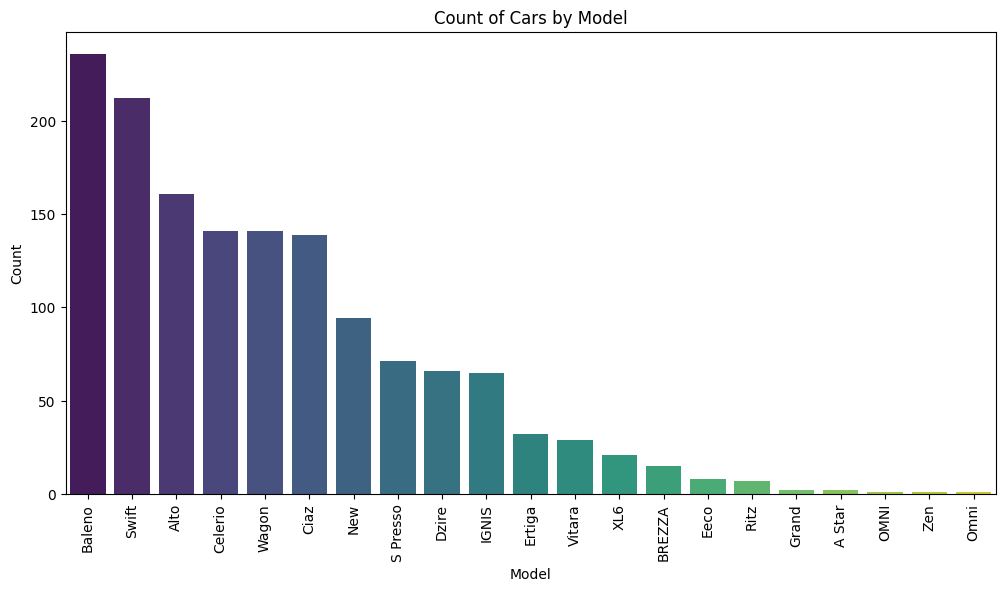

In [61]:
# Count plot for different models to check which model has max cars for resale
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='Model', order=df['Model'].value_counts().index, palette="viridis")
plt.title("Count of Cars by Model")
plt.xlabel("Model")
plt.ylabel("Count")
plt.xticks(rotation=90)   
plt.show()

**Engine Capacity measured in CC**

In [62]:
engine_counts = df['Engine capacity'].value_counts().sort_index()
print(engine_counts.head(10))

Engine capacity
796      94
998     472
1196      6
1197    589
1248     74
1373     80
1462    130
Name: count, dtype: int64


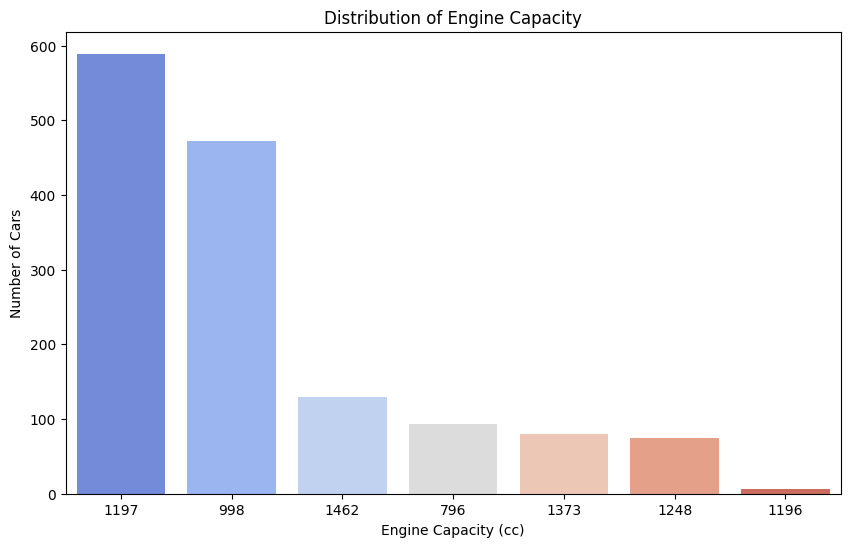

In [63]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Engine capacity', order=df['Engine capacity'].value_counts().index, palette="coolwarm")
plt.title("Distribution of Engine Capacity")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Number of Cars")
plt.show()

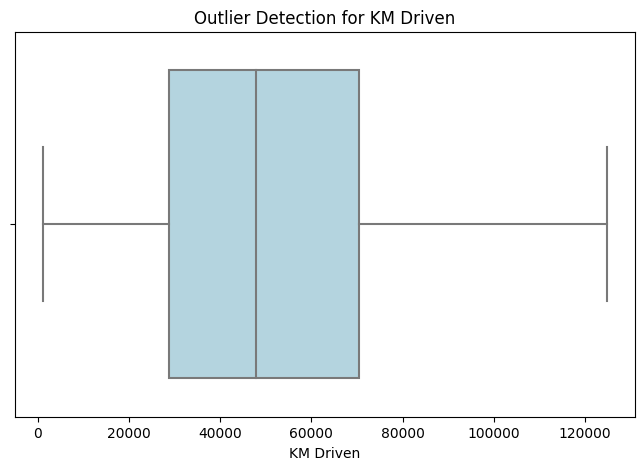

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['KM driven'], color="lightblue")
plt.title("Outlier Detection for KM Driven")
plt.xlabel("KM Driven")
plt.show()

**Ownership details**

In [65]:
ownership_counts = df['Ownership'].value_counts()
print(ownership_counts)

Ownership
1    1059
2     360
3      26
Name: count, dtype: int64


In [66]:
fuel_counts = df['Fuel type'].value_counts()
print(fuel_counts)

Fuel type
Petrol    1264
CNG        109
Diesel      72
Name: count, dtype: int64


In [67]:
transmission_counts = df['Transmission'].value_counts()
print(transmission_counts)

Transmission
Manual       1073
Automatic     372
Name: count, dtype: int64


***Price vs Manufacturing_year → Are newer cars more expensive*?**

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


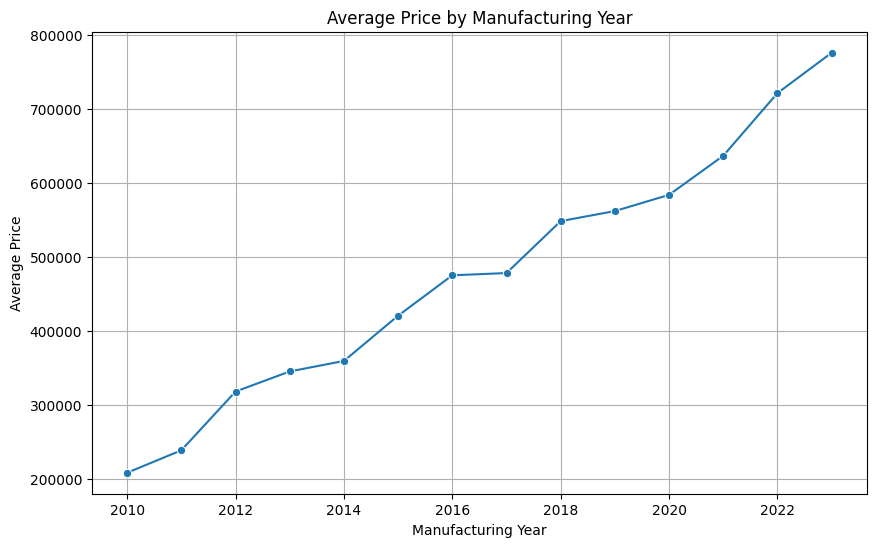

In [68]:
avg_price_by_year = df.groupby('Manufacturing_year')['Price'].mean()

plt.figure(figsize=(10,6))
sns.lineplot(x=avg_price_by_year.index, y=avg_price_by_year.values, marker="o")
plt.title("Average Price by Manufacturing Year")
plt.xlabel("Manufacturing Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

**Price vs KM driven → Does higher mileage reduce price?**

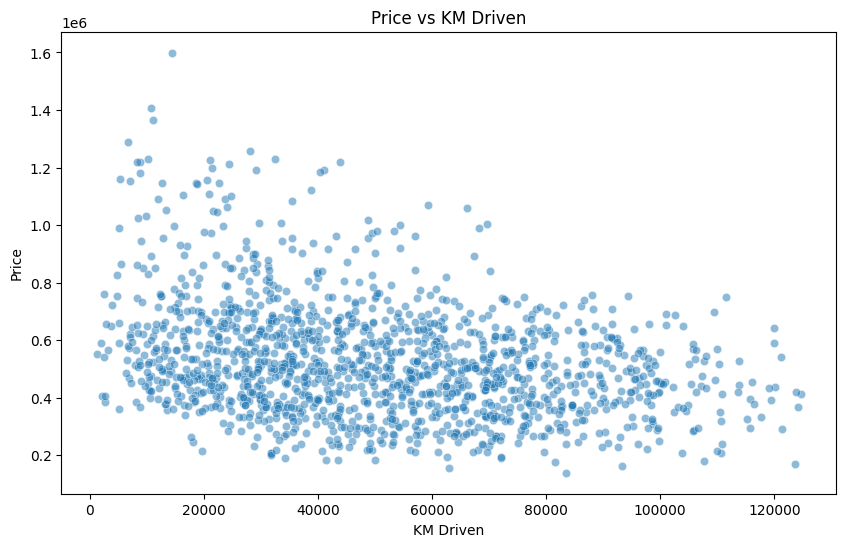

In [69]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='KM driven', y='Price', alpha=0.5)
plt.title("Price vs KM Driven")
plt.xlabel("KM Driven")
plt.ylabel("Price")
plt.show()

**Price vs Ownership → Effect of number of owners on price.**

In [70]:
avg_price_by_owner = df.groupby('Ownership')['Price'].mean().sort_index()
print(avg_price_by_owner)

Ownership
1    547910.292729
2    474272.222222
3    369500.000000
Name: Price, dtype: float64


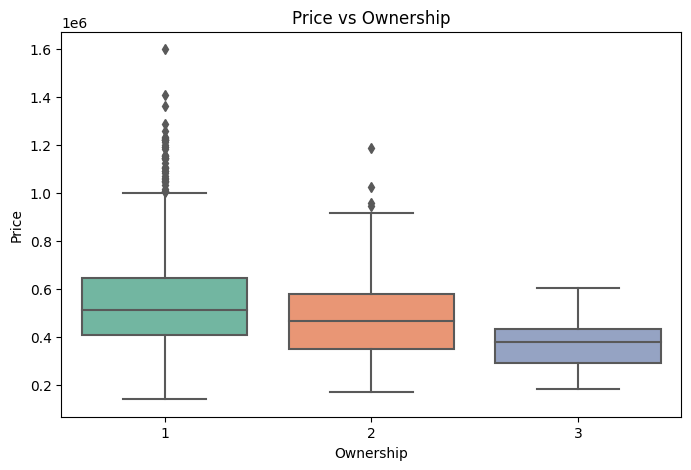

In [71]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Ownership', y='Price', palette="Set2")
plt.title("Price vs Ownership")
plt.xlabel("Ownership")
plt.ylabel("Price")
plt.show()

**Engine capacity vs price**

In [72]:
avg_price_by_engine = df.groupby('Engine capacity')['Price'].mean().sort_index()
print(avg_price_by_engine)

Engine capacity
796     317819.148936
998     402222.457627
1196    413833.333333
1197    555166.383701
1248    591702.702703
1373    587237.500000
1462    927823.076923
Name: Price, dtype: float64


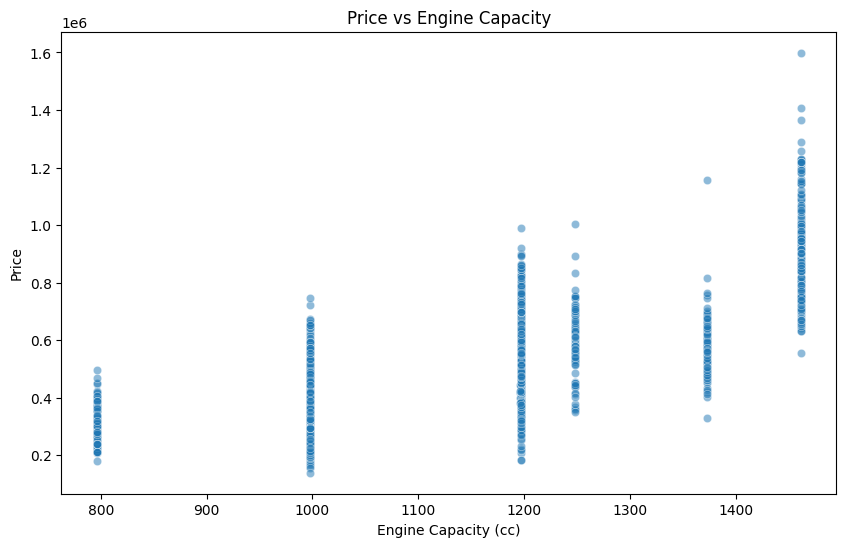

In [73]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Engine capacity', y='Price', alpha=0.5)
plt.title("Price vs Engine Capacity")
plt.xlabel("Engine Capacity (cc)")
plt.ylabel("Price")
plt.show()

**Transmission vs Price**

In [74]:
avg_price_by_trans = df.groupby('Transmission')['Price'].mean()
print(avg_price_by_trans)

Transmission
Automatic    601338.709677
Manual       500357.875116
Name: Price, dtype: float64


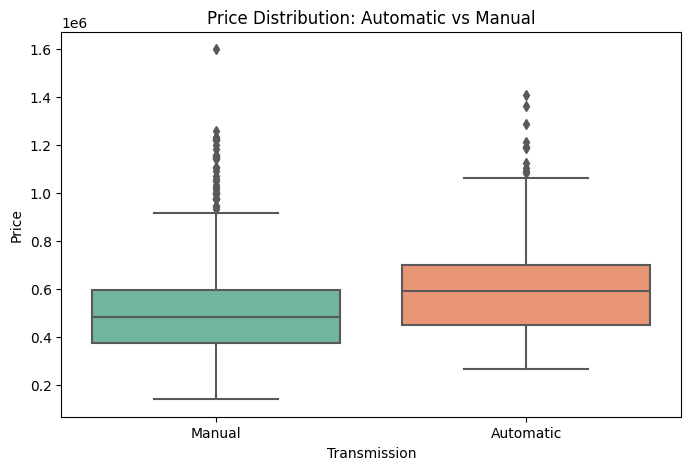

In [75]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Transmission', y='Price', palette="Set2")
plt.title("Price Distribution: Automatic vs Manual")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

**Fuel type vs Price**

In [76]:
avg_price_by_fuel = df.groupby('Fuel type')['Price'].mean()
print(avg_price_by_fuel)

Fuel type
CNG       475807.339450
Diesel    589111.111111
Petrol    527138.449367
Name: Price, dtype: float64


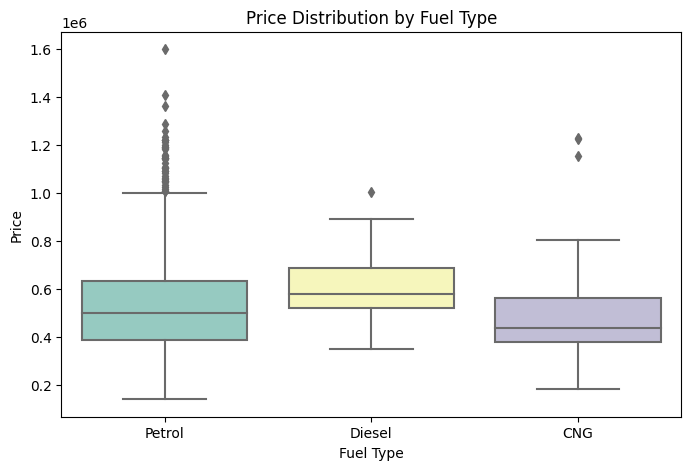

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='Fuel type', y='Price', palette="Set3")
plt.title("Price Distribution by Fuel Type")
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.show()

**Repainted vs Price**

In [78]:
avg_price_repainted = df.groupby('Repainted Parts')['Price'].mean()
print(avg_price_repainted)

Repainted Parts
0     577697.500000
1     556122.807018
2     518703.703704
3     521294.117647
4     518638.297872
5     509342.592593
6     451738.636364
7     470833.333333
8     497877.551020
9     455428.571429
10    448333.333333
11    461285.714286
12    470733.333333
13    328571.428571
14    427200.000000
15    439750.000000
16    431500.000000
17    409000.000000
18    371000.000000
21    510000.000000
27    283000.000000
Name: Price, dtype: float64


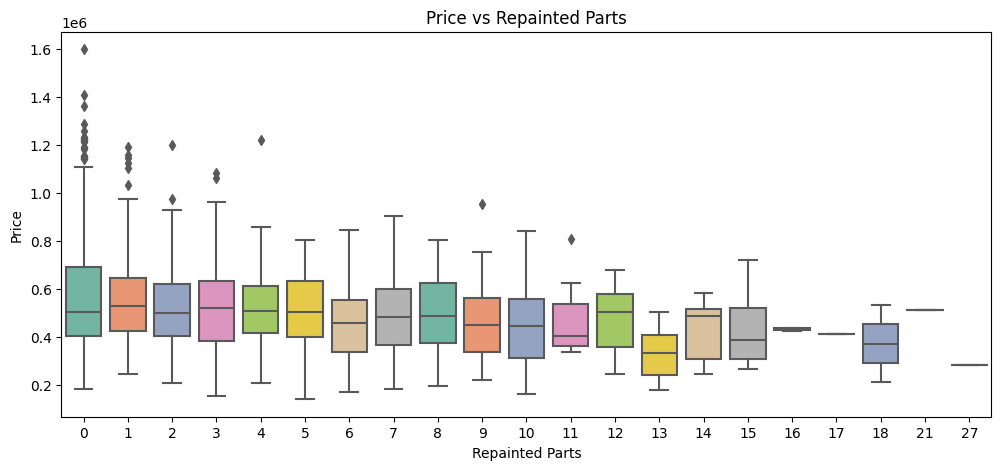

In [79]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df, x='Repainted Parts', y='Price', palette="Set2")
plt.title("Price vs Repainted Parts")
plt.xlabel("Repainted Parts")
plt.ylabel("Price")
plt.show()

**KM driven + Manufacturing_year + Ownership → Price**

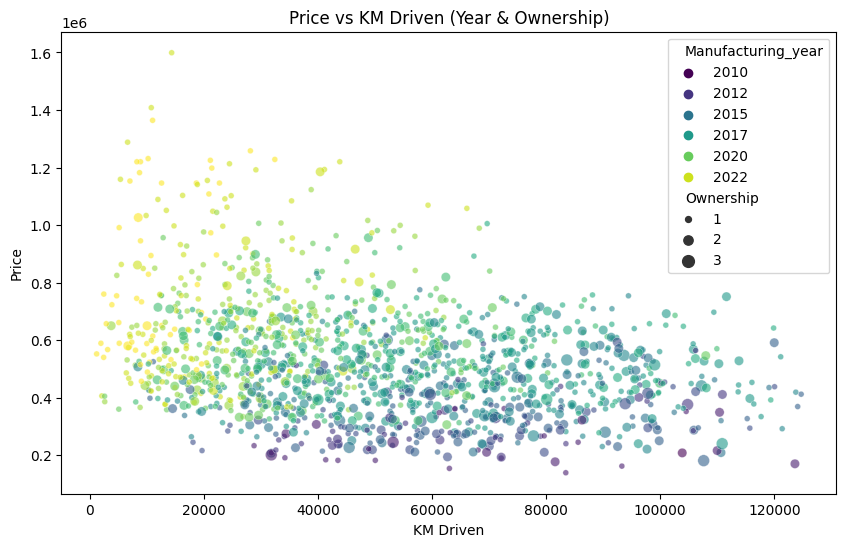

In [80]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='KM driven', y='Price', hue='Manufacturing_year', size='Ownership', alpha=0.6, palette='viridis')
plt.title("Price vs KM Driven (Year & Ownership)")
plt.xlabel("KM Driven")
plt.ylabel("Price")
plt.show()

**Fuel type + Transmission → Price**

In [81]:
avg_price = df.groupby(['Fuel type', 'Transmission'])['Price'].mean().unstack()
print(avg_price)

Transmission      Automatic         Manual
Fuel type                                 
CNG           542000.000000  474570.093458
Diesel        637142.857143  583938.461538
Petrol        600975.206612  497390.677026


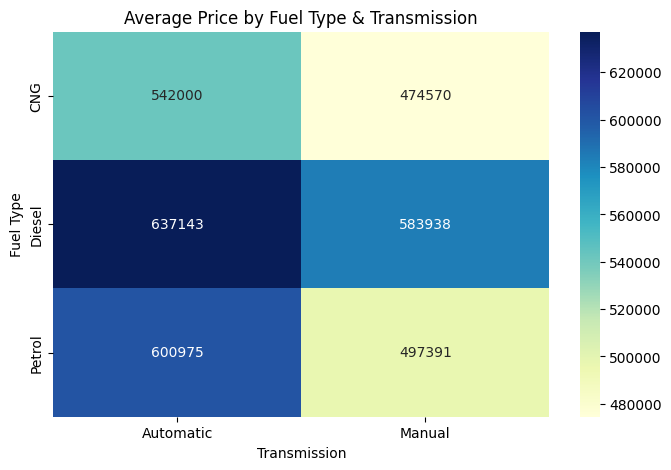

In [82]:
plt.figure(figsize=(8,5))
sns.heatmap(avg_price, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Average Price by Fuel Type & Transmission")
plt.xlabel("Transmission")
plt.ylabel("Fuel Type")
plt.show()

In [83]:
top_models = df['Model'].value_counts().nlargest(10)
print(top_models)

Model
Baleno      236
Swift       212
Alto        161
Celerio     141
Wagon       141
Ciaz        139
New          94
S Presso     71
Dzire        66
IGNIS        65
Name: count, dtype: int64


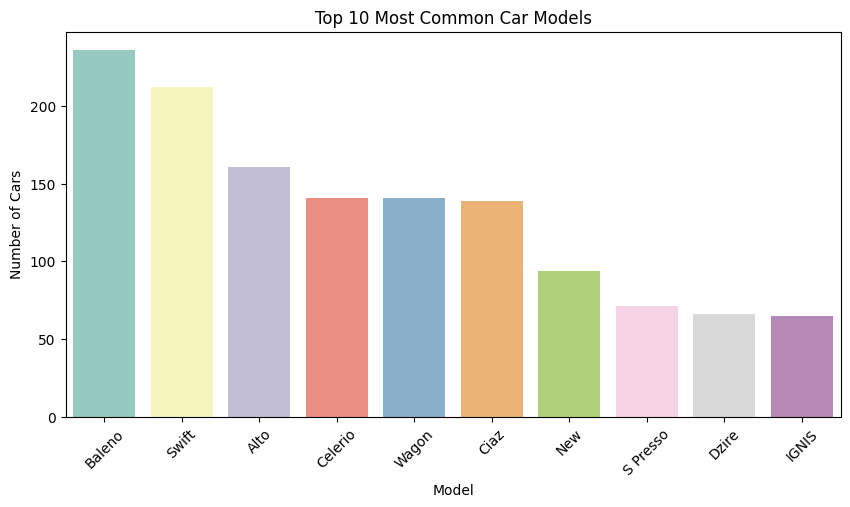

In [84]:
plt.figure(figsize=(10,5))
sns.barplot(x=top_models.index, y=top_models.values, palette="Set3")
plt.title("Top 10 Most Common Car Models")
plt.xlabel("Model")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.show()

In [43]:
corr = df[['Manufacturing_year','Price']].corr().iloc[0,1]
print("Correlation:", corr)

Correlation: 0.6150770904145622


In [85]:
corr = df[['Engine capacity','Price']].corr().iloc[0,1]
print("Correlation between Engine Capacity and Price:", corr)

Correlation between Engine Capacity and Price: 0.7189058549891199


**Insights:**
1. The dataset is of Cars24 with different models of Maruti Suzuki.
2. KM driven: Negative correlation with Price (more kms = cheaper).
3. Ownership_num: Negative correlation (more owners = cheaper).
4. Manufacturing_Year: Positive correlation (newer cars = higher price).
5. Engine capacity: Positive correlation (higher engine capacity = higher price)